In [2]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

In [5]:
api_key = 'pCRLPdf2lkjpRX9Uczpt2gVBb'
api_secret = 'G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD'
access_token = '100875722-7m5vhOzpw2LYrB7P8ISnTqtGYMMvVTqwx3X4EyJY'
access_token_secret = 'uPEymGiszhiJEVWD4Alo1pzMUJx1ymo3Fd4HWyRPRBN3r'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["python_week10"]["week10"]
col.count()

C:\Users\Asus\miniconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


5000

In [3]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["Trump",
            "Biden",
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:01:52.009835
Tweets/Sec: 44.6
Tweets collected: 5000
Total tweets in collection: 5000


C:\Users\Asus\miniconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [6]:
col.find_one()

{'_id': ObjectId('5f7d6b2504370e8b325490a5'),
 'created_at': 'Wed Oct 07 07:15:41 +0000 2020',
 'id': 1313739761069166592,
 'id_str': '1313739761069166592',
 'text': 'RT @charliekirk11: WOW:\n\nTonight in Utah—an overflow crowd to support FOUR MORE YEARS of President Trump\n\nBiden is losing younger voters. W…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 789090797278953472,
  'id_str': '789090797278953472',
  'name': 'Linda Campbell',
  'screen_name': 'AtomicLinda13',
  'location': 'Pennsylvania, USA',
  'url': None,
  'description': 'Trump supporter from the beginning.\nMother, Grandmother, and Wife.\nBlack Labs Matter',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 1651,
  'friends_c

In [7]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,text,user,source,lang
0,Wed Oct 07 07:15:41 +0000 2020,RT @charliekirk11: WOW:\n\nTonight in Utah—an ...,@AtomicLinda13,"<a href=""http://twitter.com/download/android"" ...",en
1,Wed Oct 07 07:15:41 +0000 2020,RT @wouanes: Mais du coup on sait quel COVID a...,@istobe1,"<a href=""http://twitter.com/download/android"" ...",fr
2,Wed Oct 07 07:15:41 +0000 2020,RT @AngrierWHStaff: Trump just tweeted that he...,@LKendrix,"<a href=""http://twitter.com/download/android"" ...",en
3,Wed Oct 07 07:15:41 +0000 2020,RT @paulsperry_: Will next debate moderator St...,@sgtshulze,"<a href=""http://twitter.com/download/android"" ...",en
4,Wed Oct 07 07:15:41 +0000 2020,RT @yujikawakubo711: 当然。\n\n https://t.co/zQP7...,@zcATVFWdnsl5hmT,"<a href=""http://twitter.com/download/android"" ...",ja
...,...,...,...,...,...
4995,Wed Oct 07 07:17:33 +0000 2020,"RT @sfpelosi: In the past few hours, Trump has...",@HumpfreyBogart,"<a href=""http://twitter.com/download/android"" ...",en
4996,Wed Oct 07 07:17:33 +0000 2020,RT @thebradfordfile: Trump was never supposed ...,@DianneSteiner,"<a href=""http://twitter.com/download/iphone"" r...",en
4997,Wed Oct 07 07:17:33 +0000 2020,RT @paulsperry_: Never before in the history o...,@amazingUSA12,"<a href=""http://twitter.com/download/iphone"" r...",en
4998,Wed Oct 07 07:17:33 +0000 2020,RT @RX_DiVE: 「ロックマンX DiVE オリジナルトランプ」が抽選で50名様に当...,@masa_k_dev,"<a href=""http://twitter.com/download/iphone"" r...",ja


In [8]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,4043
1,the,3242
2,trump,2881
3,to,1838
4,https,1356
5,of,1336
6,co,1306
7,is,1232
8,and,1219
9,in,1062


C:\Users\Asus\miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Tweetbot for iΟS           5
Twitterrific for iOS       7
dlvr.it                    9
WordPress.com              9
TweetDeck                 20
IFTTT                     79
Twitter for iPad         327
Twitter Web App         1022
Twitter for Android     1429
Twitter for iPhone      2037
Name: source, dtype: int64

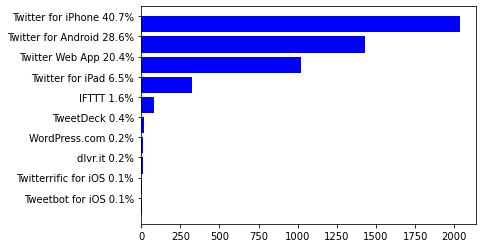

In [9]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

pt       11
nl       17
tr       22
it       29
de       35
ja       42
fr       68
es      103
und     105
en     4524
Name: lang, dtype: int64

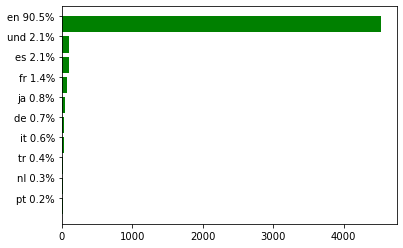

In [10]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [11]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [12]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1313739761069166592,RT @charliekirk11: WOW:\n\nTonight in Utah—an ...,en
2,1313739761316700165,RT @AngrierWHStaff: Trump just tweeted that he...,en
3,1313739761471942656,RT @paulsperry_: Will next debate moderator St...,en
5,1313739761547390976,RT @realDonaldTrump: Because Mueller and his 1...,en
7,1313739761580900352,RT @DonaldJTrumpJr: The main stream media is a...,en
...,...,...,...
4994,1313740230181220352,"RT @BethLynch2020: ""North Koreans are brainwas...",en
4995,1313740230327963648,"RT @sfpelosi: In the past few hours, Trump has...",en
4996,1313740230558703617,RT @thebradfordfile: Trump was never supposed ...,en
4997,1313740230734700546,RT @paulsperry_: Never before in the history o...,en


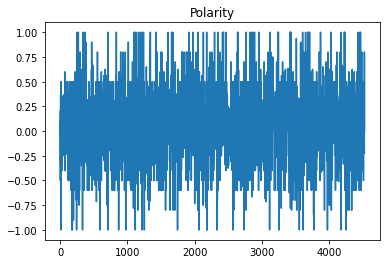

In [13]:
from  textblob import TextBlob
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

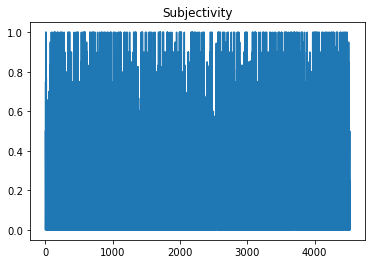

In [14]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [15]:
import statistics
statistics.mean(poltweet.polarity)

0.03730367709552509

In [16]:
import statistics
statistics.mean(poltweet.subjectivity)

0.3284776941220354